# Library Import

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
rc('font', family='gulim')

# Read Data

In [3]:
# 파일 읽기
joined_test_data = pd.read_csv('./joined_test_data.csv', index_col = 0)
joined_test_data

,user_id,bank_id,product_id,loan_limit,loan_rate,insert_weekday,age,age_group,gender,credit_score,...,event3,event4,event5,event6,event7,event8,event9,event10,event11,is_applied
0,545882,54,235,11000000.0,16.5,0,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,0.0
1,545882,11,118,3000000.0,20.0,0,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,0.0
2,545882,11,118,3000000.0,20.0,3,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,0.0
3,545882,54,235,7000000.0,16.5,3,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,1.0
4,545882,11,118,2000000.0,20.0,1,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9875655,818151,1,61,12000000.0,15.4,0,50.0,50.0,1.0,630.0,...,2.0,2.0,3.0,2.0,5.0,2.0,0.0,0.0,3.0,1.0
9875656,43054,6,36,14000000.0,18.4,0,33.0,30.0,1.0,570.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
9875657,508855,29,75,18000000.0,9.4,0,31.0,30.0,0.0,610.0,...,0.0,6.0,8.0,3.0,17.0,5.0,0.0,0.0,6.0,1.0
9875658,508855,29,75,18000000.0,9.4,0,31.0,30.0,0.0,610.0,...,0.0,6.0,8.0,3.0,17.0,5.0,0.0,0.0,6.0,1.0


In [4]:
true_data = joined_test_data[joined_test_data['is_applied'] == 1]
true_data = true_data.reset_index()
true_data = true_data.drop(columns=['index'])
true_data

,user_id,bank_id,product_id,loan_limit,loan_rate,insert_weekday,age,age_group,gender,credit_score,...,event3,event4,event5,event6,event7,event8,event9,event10,event11,is_applied
0,545882,54,235,7000000.0,16.5,3,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,1.0
1,545882,23,236,21000000.0,15.5,1,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,1.0
2,545882,23,108,21000000.0,16.1,1,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,1.0
3,545882,38,223,10000000.0,17.4,1,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,1.0
4,545882,17,19,10000000.0,16.4,1,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549660,818151,1,61,12000000.0,15.4,0,50.0,50.0,1.0,630.0,...,2.0,2.0,3.0,2.0,5.0,2.0,0.0,0.0,3.0,1.0
549661,43054,6,36,14000000.0,18.4,0,33.0,30.0,1.0,570.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
549662,508855,29,75,18000000.0,9.4,0,31.0,30.0,0.0,610.0,...,0.0,6.0,8.0,3.0,17.0,5.0,0.0,0.0,6.0,1.0
549663,508855,29,75,18000000.0,9.4,0,31.0,30.0,0.0,610.0,...,0.0,6.0,8.0,3.0,17.0,5.0,0.0,0.0,6.0,1.0


# Exploratory Data Analysis

In [15]:
existing_loan_amt = pd.value_counts(true_data['existing_loan_amt'], sort=True).sort_index()
existing_loan_amt

0.000000e+00    122419
1.000000e+06      2532
2.000000e+06      3549
3.000000e+06      7157
4.000000e+06      4122
                 ...  
1.730000e+09         2
1.946000e+09         7
2.581000e+09         3
3.164000e+09         1
7.512000e+09         2
Name: existing_loan_amt, Length: 834, dtype: int64

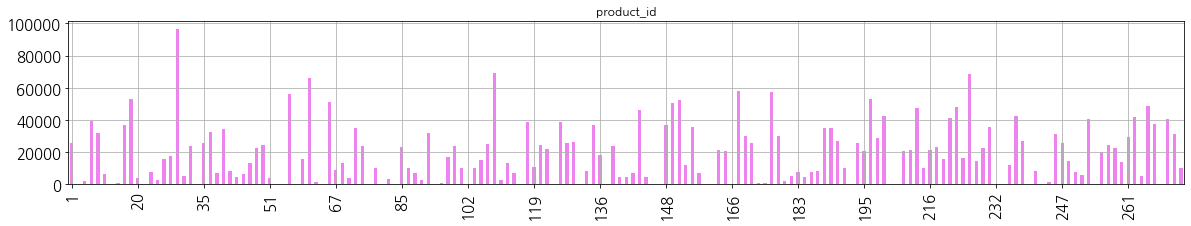

In [6]:
product_id = pd.value_counts(predicted_result['product_id'], sort=True).sort_index()
product_id.plot.bar(grid=True, figsize=(20,3), color=['violet'], fontsize=15, title='product_id').set_xticks(np.arange(0, len(product_id.index) + 1, 10))  # figsize, fontsize 조정
plt.show()

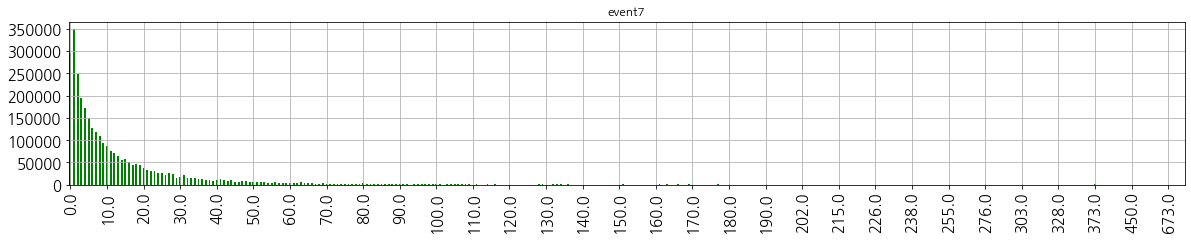

In [7]:
event7 = pd.value_counts(predicted_result['event7'], sort=True).sort_index()
event7.plot.bar(grid=True, figsize=(20,3), color=['green'], fontsize=15, title='event7').set_xticks(np.arange(0, len(event7.index) + 1, 10))  # figsize, fontsize 조정
plt.show()

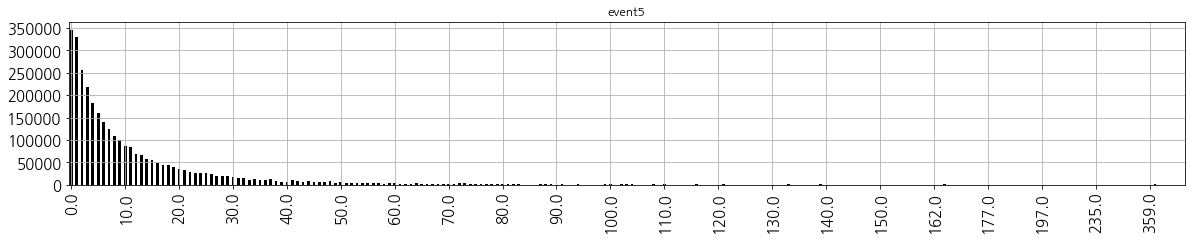

In [8]:
event5 = pd.value_counts(predicted_result['event5'], sort=True).sort_index()
event5.plot.bar(grid=True, figsize=(20,3), color=['black'], fontsize=15, title='event5').set_xticks(np.arange(0, len(event5.index) + 1, 10))  # figsize, fontsize 조정
plt.show()

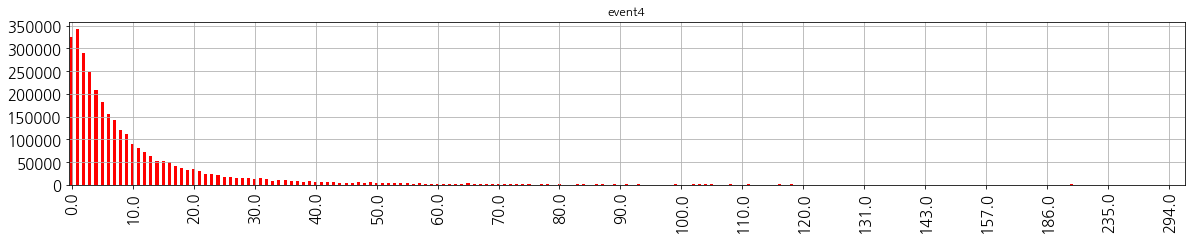

In [9]:
event4 = pd.value_counts(predicted_result['event4'], sort=True).sort_index()
event4.plot.bar(grid=True, figsize=(20,3), color=['red'], fontsize=15, title='event4').set_xticks(np.arange(0, len(event4.index) + 1, 10))  # figsize, fontsize 조정
plt.show()

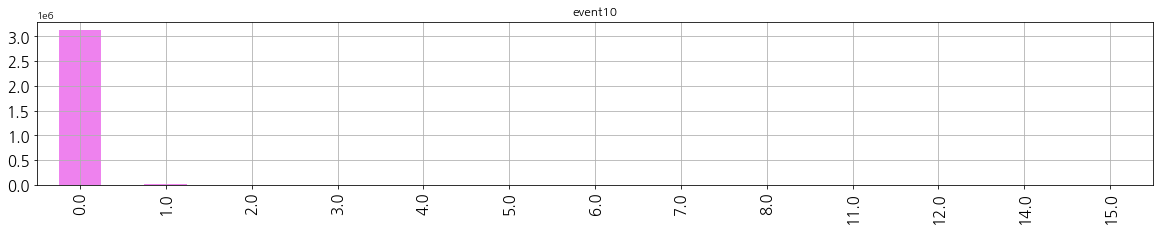

In [10]:
event10 = pd.value_counts(predicted_result['event10'], sort=True).sort_index()
event10.plot.bar(grid=True, figsize=(20,3), color=['violet'], fontsize=15, title='event10')  # figsize, fontsize 조정
plt.show()

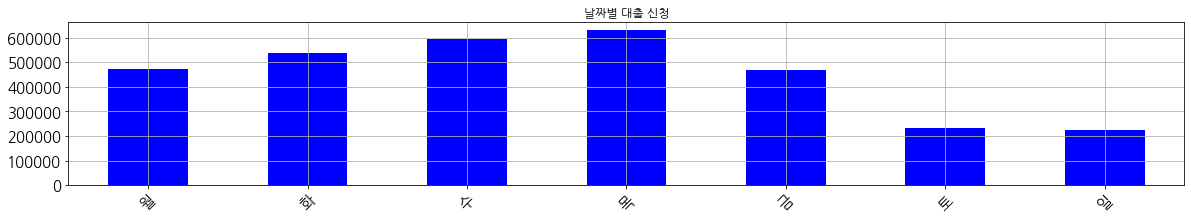

In [11]:
insert_weekday = pd.value_counts(predicted_result['insert_weekday'], sort=True).sort_index()
insert_weekday = insert_weekday.plot.bar(grid=True, figsize=(20,3), color=['blue'], fontsize=15, title='날짜별 대출 신청')  # figsize, fontsize 조정
insert_weekday.set_xticklabels(['월', '화', '수', '목', '금', '토', '일'], rotation=45)
plt.show()

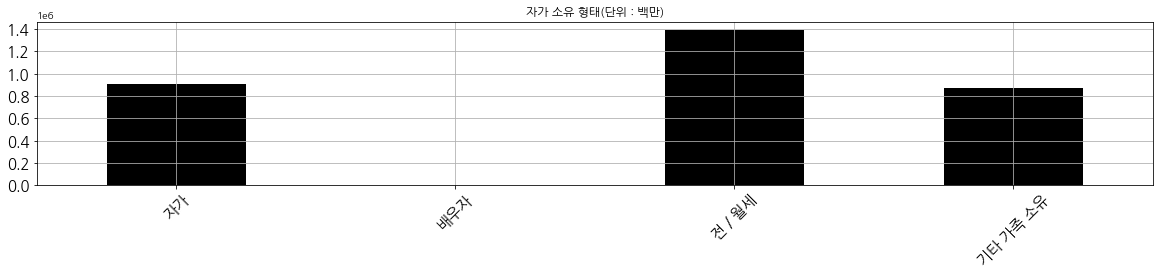

In [45]:
# 1 : 자가, 3 : 전, 월세 4 : 기타 가족 소유

houseown_type = pd.value_counts(predicted_result['houseown_type'], sort=True).sort_index()
houseown_type.plot.bar(grid=True, figsize=(20,3), color=['black'], fontsize=15, title='자가 소유 형태(단위 : 백만)').set_xticklabels(['자가', '배우자', '전 / 월세', '기타 가족 소유'], rotation = 45) # figsize, fontsize 조정
plt.show()


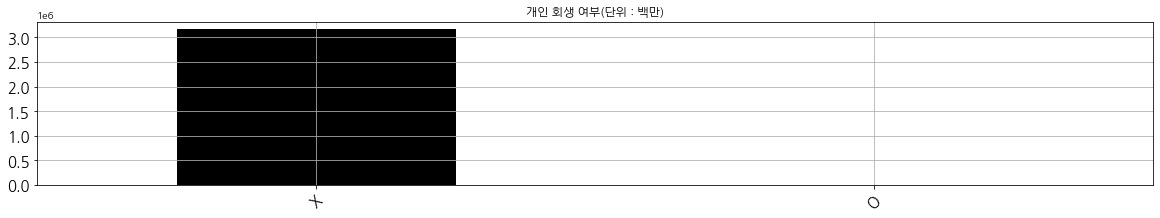

In [46]:
personal_rehabilitation_complete_yn = pd.value_counts(predicted_result['personal_rehabilitation_complete_yn'], sort=True).sort_index()
personal_rehabilitation_complete_yn = personal_rehabilitation_complete_yn.plot.bar(grid=True, figsize=(20,3), color=['black'], fontsize=15, title='개인 회생 여부(단위 : 백만)')  # figsize, fontsize 조정
personal_rehabilitation_complete_yn.set_xticklabels(['X' , 'O'], rotation = 45)
plt.show()

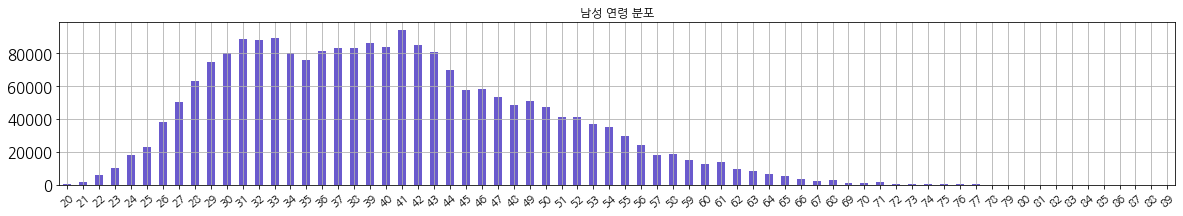

In [28]:
gender_man = predicted_result[predicted_result['gender']==1]

people_m = pd.value_counts(gender_man['age'].values, sort=False).sort_index()
people_m = people_m.plot.bar(grid=True, figsize=(20,3), color=['slateblue'], fontsize=15)  # figsize, fontsize 조정
people_m.set_title('남성 연령 분포')

label = [str(i) for i in range(20, 90)]

people_m.set_xticklabels(label, rotation = 40, fontsize = 11)

plt.show()

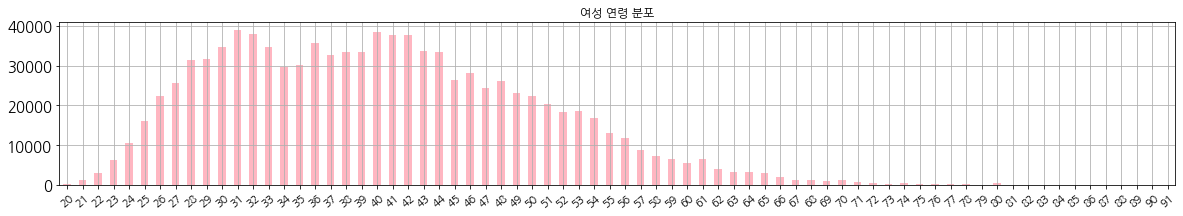

In [31]:
gender_woman = predicted_result[predicted_result['gender']==0]

people_w = pd.value_counts(gender_woman['age'].values, sort=False).sort_index()
people_w = people_w.plot.bar(grid=True, figsize=(20,3), color=['lightpink'], fontsize=15)  # figsize, fontsize 조정
people_w.set_title('여성 연령 분포')

label = []

for i in range(20, 93) :
    if i != 92 :
        label.append(str(i))

people_w.set_xticklabels(label, rotation = 40, fontsize = 11)

plt.show()